In [1]:
#Implementation of a convolutional Neural Network (CNN) with the 10-Species Monkey Dataset

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Create an ImageGenerator object that is used to randomize and make certain small transformations to the image
#to build better and robust networks

from keras.preprocessing.image import ImageDataGenerator

In [4]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              zoom_range=0.2,
                              shear_range=0.2,
                              fill_mode='nearest')

## Model:

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

#Now need to flatten the model essentally 2d to 1d
model.add(Flatten())

#Now include the Dense layers
model.add(Dense(128,activation='relu'))

#Finally, the output layer
model.add(Dense(10 , activation ='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
train_directory = '/home/amoghavarsha/Project_CNN/my_project_env/Dataset/training/training'
validation_directory = '/home/amoghavarsha/Project_CNN/my_project_env/Dataset/validation/validation'

In [9]:
## Getting the training and the validation sets
batch_size = 16
train_gen = image_gen.flow_from_directory(train_directory,target_size=(150,150),batch_size=batch_size,
                                         class_mode='categorical')

Found 1098 images belonging to 10 classes.


In [10]:
validation_gen = image_gen.flow_from_directory(validation_directory,target_size=(150,150),batch_size=batch_size,
                                         class_mode='categorical')

Found 272 images belonging to 10 classes.


## Training the Model

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
results = model.fit_generator(train_gen,epochs=30,steps_per_epoch=1097//batch_size,
                              validation_data=validation_gen,validation_steps=272//batch_size)

Epoch 1/30
68/68 [==============================] - 65s 932ms/step - loss: 2.3081 - accuracy: 0.1275 - val_loss: 1.8777 - val_accuracy: 0.3199
Epoch 2/30
68/68 [==============================] - 47s 687ms/step - loss: 1.7503 - accuracy: 0.3644 - val_loss: 1.4646 - val_accuracy: 0.4816
Epoch 3/30
68/68 [==============================] - 44s 649ms/step - loss: 1.3367 - accuracy: 0.5270 - val_loss: 1.3534 - val_accuracy: 0.5221
Epoch 4/30
68/68 [==============================] - 44s 650ms/step - loss: 1.2484 - accuracy: 0.5447 - val_loss: 1.3308 - val_accuracy: 0.4779
Epoch 5/30
68/68 [==============================] - 44s 653ms/step - loss: 1.2025 - accuracy: 0.5872 - val_loss: 1.2622 - val_accuracy: 0.5441
Epoch 6/30
68/68 [==============================] - 45s 666ms/step - loss: 1.1375 - accuracy: 0.5830 - val_loss: 1.3319 - val_accuracy: 0.5368
Epoch 7/30
68/68 [==============================] - 49s 718ms/step - loss: 0.9892 - accuracy: 0.6521 - val_loss: 1.2627 - val_accuracy: 0.5735

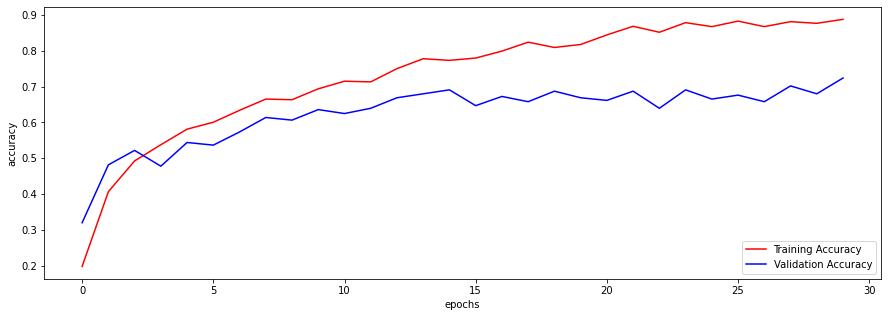

In [13]:
plt.figure(figsize=(15,5))

plt.plot(results.history['accuracy'],'r',label='Training Accuracy')
plt.plot(results.history['val_accuracy'],'b',label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

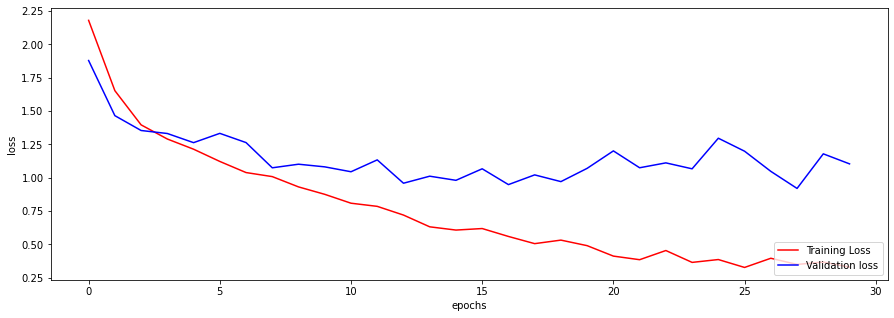

In [14]:
plt.figure(figsize=(15,5))
plt.plot(results.history['loss'],'r',label='Training Loss')
plt.plot(results.history['val_loss'],'b',label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [15]:
_, acc = model.evaluate_generator(validation_gen, steps=272 //batch_size)

In [16]:
print('The testing accuracy for the CNN with the 10-Species-Monkey dataset is : %.3f' % (acc * 100.0))

The testing accuracy for the CNN with the 10-Species-Monkey dataset is : 69.485
